# Neural Network Problem 2

#### Data description:

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

#### Task:
Predict the turbine energy yield (TEY) using ambient variables as features.

#### Attribute Information:
The explanations of sensor measurements and their brief statistics are given below.
- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C â€“6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - Split dataset train and test for NN Classification of original dataset.
    - Normalize after splitting
3. Neural Network Modelling
    - Assign model parameters
    - Build Model
    - Compile Model & Fit the model
    - Model Evaluation
    - Visualize Training History
5. Conclusion

#### References: 
 - https://www.tensorflow.org/api_docs/python/tf/keras
 - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
 - https://faroit.com/keras-docs/1.2.0/getting-started/sequential-model-guide/
 - https://medium.com/fintechexplained/what-are-hidden-layers-4f54f7328263 (#### VERY IMP)
 - https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a

## Import New Dataset

In [1]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14)  #Reference: https://www.youtube.com/watch?v=4ZhnXxfW8WQ&list=LL&index=1&t=1743s

In [3]:
raw_data = pd.read_csv("//Users//sreeramkn//Downloads//gas_turbines.csv")
raw_data.head() 
#TEY is the variable we should predict.
#We need to consider only ambient Variables AT AP AH. Rest of it can be ignored.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df = raw_data.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
df.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.describe() #We need to normalize the values before modeling

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


This is a Regression Problem. Output TEY is between 175 and 100. There are 15k possible values in that range.

<AxesSubplot:>

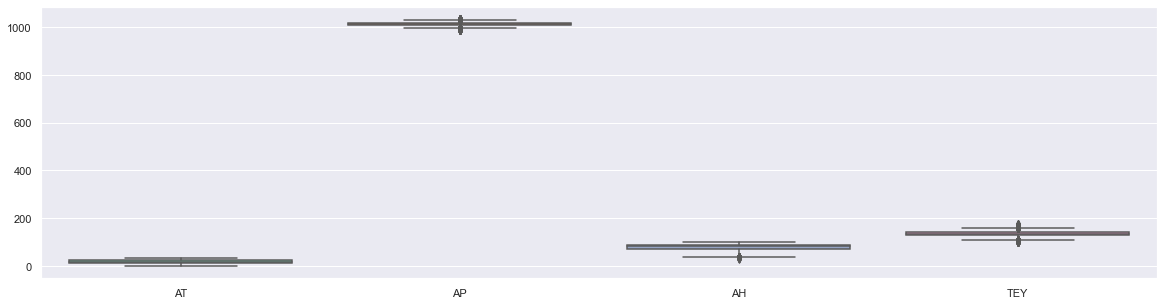

In [7]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df, orient="v", palette="Set2") 
#No Outliers. But we need to standardize the data

## Feature Analysis

All features in the dataset can be used in model building. 
This is a Regression Problem.

### Train | Split dataset
#### Original Dataset

In [8]:
#A common mistake when configuring a neural network is to first normalize the data before splitting the data.
# Reference 5

X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [9]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) #https://stackoverflow.com/questions/57192304/numpy-python-exception-data-must-be-1-dimensional
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [11]:
len(xtrain_scale)

10527

### Visualizing the data

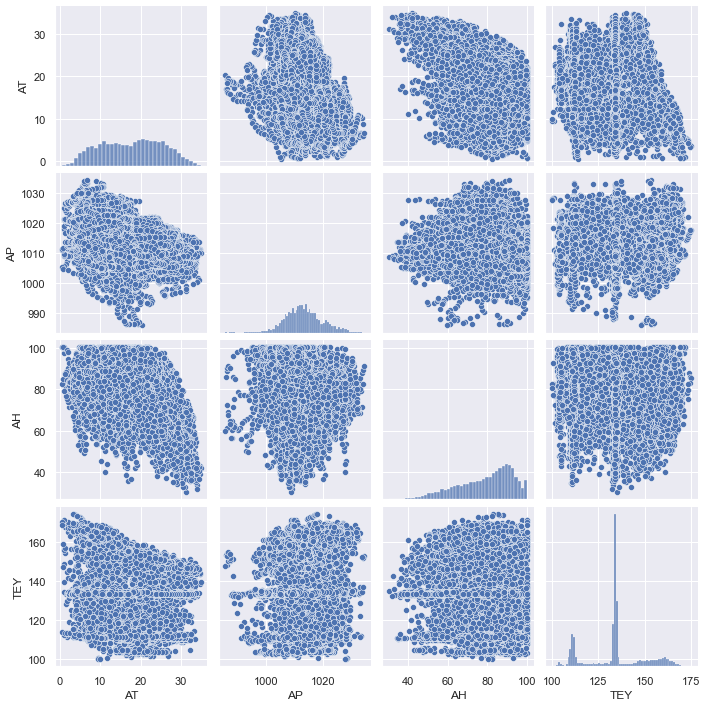

In [12]:
sns.pairplot(df,palette='deep')

## Neural Network Modelling
#### Building the Model

Read Reference 4 and 5

#### Number of Neurons in Input layer:
- Number of features in the training set + 1.
- One additional node is to capture the bias term.
- There ip Neuron count is 4 in our case.

#### Number of Neurons in Output layer:
- Number of neurons is 1 since we have regressor problem.

#### Number of Neurons in Input layer:
- Number of neurons is given by  Training Data Samples/Factor * (Input Neurons + Output Neurons)
- This is about 2106 Neurons

In [13]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [14]:
import keras
keras. __version__ #init method is not available in this mdethod

'2.8.0'

In [15]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))

In [16]:
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [17]:
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0758 - mse: 0.0758 - mae: 0.2118 - val_loss: 0.0450 - val_mse: 0.0450 - val_mae: 0.1489
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - mae: 0.1579 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1484
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0471 - mse: 0.0471 - mae: 0.1586 - val_loss: 0.0444 - val_mse: 0.0444 - val_mae: 0.1501
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466 - mae: 0.1564 - val_loss: 0.0442 - val_mse: 0.0442 - val_mae: 0.1513
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1571 - val_loss: 0.0435 - val_mse: 0.0435 - val_mae: 0.1486
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1575 - val_loss: 0.0430 - val_mse: 0.0430 - val_mae: 0.1485
Epoch 7/100
48/48 [===

48/48 [==============================] - 0s 4ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1613 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1544
Epoch 52/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1605 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1568
Epoch 53/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1603 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1602
Epoch 54/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1598 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1553
Epoch 55/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1595 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1555
Epoch 56/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1593 - val_loss: 0.0382 - val_mse: 0.0382 - val_mae: 0.1549
Epoch 57/100
48/48 [=========

In [18]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


#### Model Evaluation

In [19]:
y_predict = model1.predict(xtest_scale)

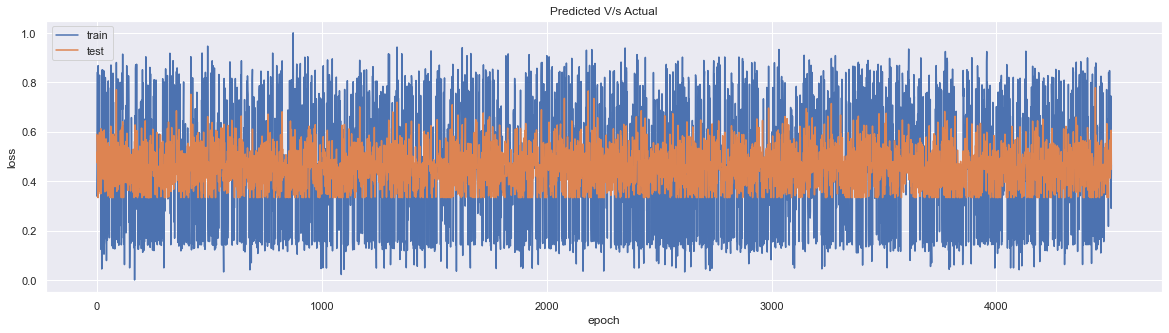

In [20]:
# Comparison of prediction and actual values

plt.plot(ytest_scale)
plt.plot(y_predict)
plt.title('Predicted V/s Actual')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #Neural Networks is not a good model for predicting a regression problem

In [21]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [22]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.039173,0.039173,0.157255,0.037761,0.037761,0.154446,95
96,0.039594,0.039594,0.159033,0.037754,0.037754,0.153182,96
97,0.039125,0.039125,0.157404,0.038261,0.038261,0.154554,97
98,0.039399,0.039399,0.158747,0.038422,0.038422,0.154833,98
99,0.041156,0.041156,0.163350,0.037607,0.037607,0.151546,99


#### Visualize Training History

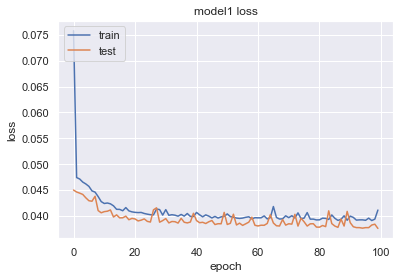

In [23]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

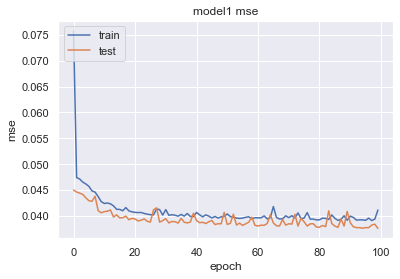

In [24]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 


## Conclusion
- EDA was perfomed on initial dataset and all errors were removed.
- Inbuilt databias of the dataset was rectified.
- A general Neural Network was built first using random Parameters.
- Training history plotting was done for the above model.
- It is understood that Neural Networks is not a good methodology for this regression problem.